In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Tractor-Sales.csv')

In [3]:
dataset

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203
...,...,...
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
dates = pd.date_range(start = '2003-01-01',periods = len(dataset),freq='MS')
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [6]:
dataset['month']= dates.month
dataset['year']= dates.year

In [7]:
dataset

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
...,...,...,...,...
139,Aug-14,848,8,2014
140,Sep-14,640,9,2014
141,Oct-14,581,10,2014
142,Nov-14,519,11,2014


In [8]:
import calendar
calendar.month_abbr[1]

'Jan'

In [9]:
dataset['Month'] = dataset['month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
dataset

,Month-Year,Number of Tractor Sold,month,year,Month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,Aug
140,Sep-14,640,9,2014,Sep
141,Oct-14,581,10,2014,Oct
142,Nov-14,519,11,2014,Nov


In [11]:
dataset.head(12)

,Month-Year,Number of Tractor Sold,month,year,Month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May
5,Jun-03,189,6,2003,Jun
6,Jul-03,207,7,2003,Jul
7,Aug-03,207,8,2003,Aug
8,Sep-03,171,9,2003,Sep
9,Oct-03,150,10,2003,Oct


In [12]:
dataset.rename(columns = {'Number of Tractor Sold':'Tractor-sales'},inplace=True)

In [13]:
dataset

,Month-Year,Tractor-sales,month,year,Month
0,Jan-03,141,1,2003,Jan
1,Feb-03,157,2,2003,Feb
2,Mar-03,185,3,2003,Mar
3,Apr-03,199,4,2003,Apr
4,May-03,203,5,2003,May
...,...,...,...,...,...
139,Aug-14,848,8,2014,Aug
140,Sep-14,640,9,2014,Sep
141,Oct-14,581,10,2014,Oct
142,Nov-14,519,11,2014,Nov


In [14]:
dataset.set_index(dates,inplace = True)

In [15]:
dataset

,Month-Year,Tractor-sales,month,year,Month
2003-01-01,Jan-03,141,1,2003,Jan
2003-02-01,Feb-03,157,2,2003,Feb
2003-03-01,Mar-03,185,3,2003,Mar
2003-04-01,Apr-03,199,4,2003,Apr
2003-05-01,May-03,203,5,2003,May
...,...,...,...,...,...
2014-08-01,Aug-14,848,8,2014,Aug
2014-09-01,Sep-14,640,9,2014,Sep
2014-10-01,Oct-14,581,10,2014,Oct
2014-11-01,Nov-14,519,11,2014,Nov


In [16]:
dataset = dataset[['Tractor-sales','Month','year']]
dataset

,Tractor-sales,Month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003
...,...,...,...
2014-08-01,848,Aug,2014
2014-09-01,640,Sep,2014
2014-10-01,581,Oct,2014
2014-11-01,519,Nov,2014


In [17]:
ts_sales = dataset['Tractor-sales']

<Axes: >

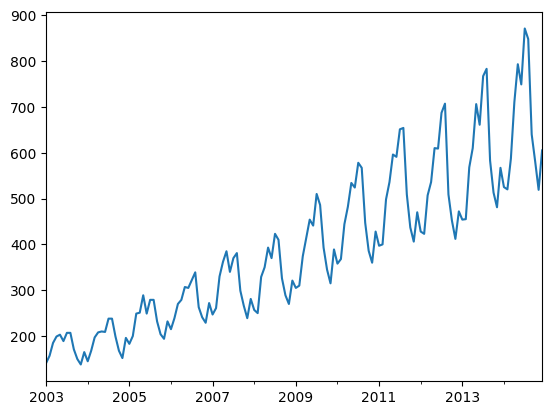

In [18]:
ts_sales.plot()

In [19]:
# Decompose data
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decompose = seasonal_decompose(ts_sales)

In [21]:
import matplotlib.pyplot as plt


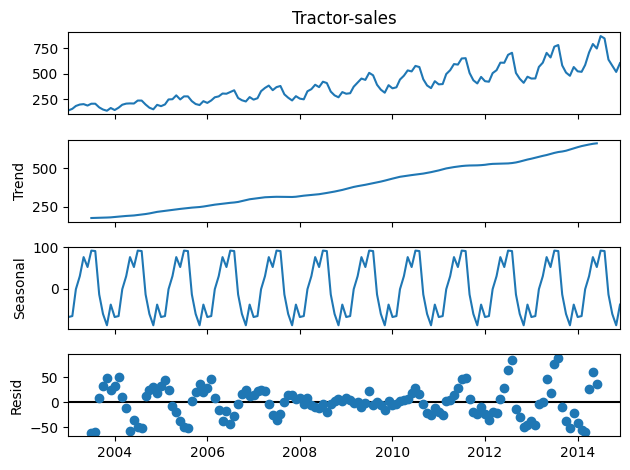

In [22]:
decompose.plot();

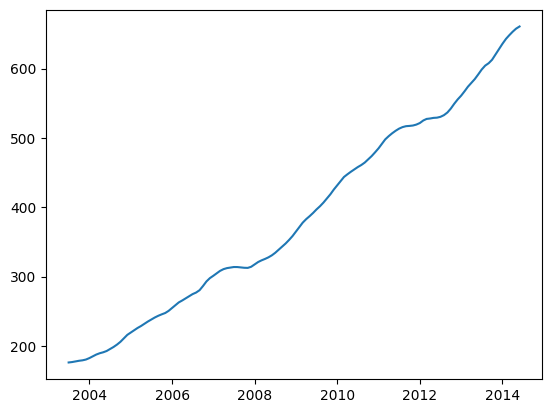

In [23]:
plt.plot(decompose.trend)

In [24]:
# rolling stats
ts_sales.rolling(window=4).mean()

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
               ...  
2014-08-01    815.25
2014-09-01    777.00
2014-10-01    735.00
2014-11-01    647.00
2014-12-01    586.25
Freq: MS, Name: Tractor-sales, Length: 144, dtype: float64

In [25]:
# rolling stats
ts_sales.rolling(window=6).mean()

2003-01-01           NaN
2003-02-01           NaN
2003-03-01           NaN
2003-04-01           NaN
2003-05-01           NaN
                 ...    
2014-08-01    759.666667
2014-09-01    768.500000
2014-10-01    747.000000
2014-11-01    701.333333
2014-12-01    677.333333
Freq: MS, Name: Tractor-sales, Length: 144, dtype: float64

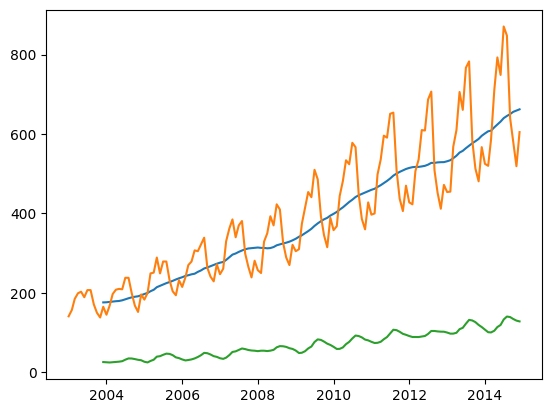

In [26]:
# rolling stats
plt.plot(ts_sales.rolling(window=12).mean())
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).std())

In [27]:
updated_data = pd.pivot(dataset,values = 'Tractor-sales',index ='Month',columns='year')

<Axes: xlabel='Month'>

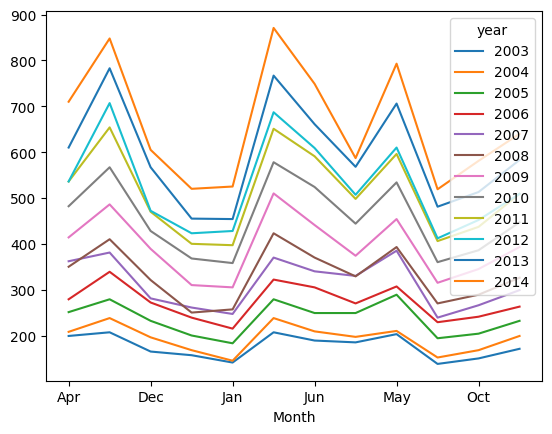

In [28]:
updated_data.plot()

<Axes: xlabel='year'>

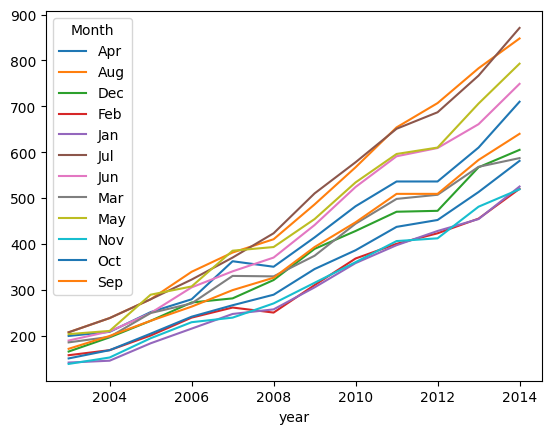

In [29]:
pd.pivot(dataset,values = 'Tractor-sales',index ='year',columns='Month').plot()

<Axes: >

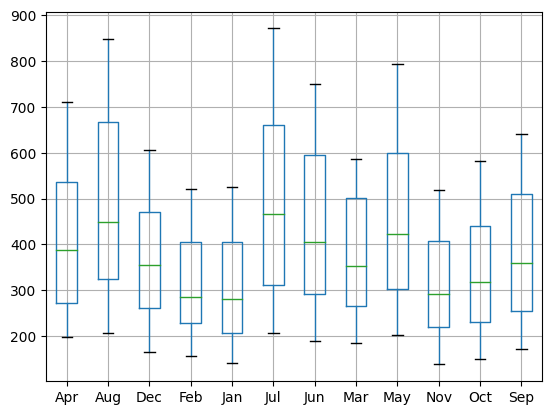

In [30]:
pd.pivot(dataset,values = 'Tractor-sales',index ='year',columns='Month').boxplot()

<ipython-input-31-81a5627d4c5b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ts_sales)


<Axes: xlabel='Tractor-sales', ylabel='Density'>

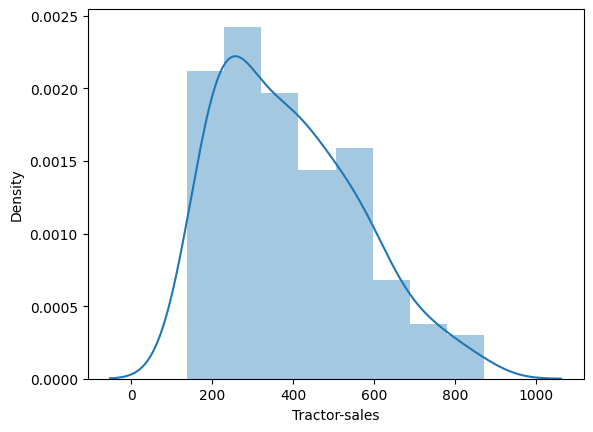

In [31]:
import seaborn as sns

sns.distplot(ts_sales)

In [32]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts_sales)

(1.1088250591467337,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [33]:
def test_stationary(timeseries):
  rollmean = timeseries.rolling(12).mean()
  rollstddev = timeseries.rolling(12).std()

  plt.figure(figsize=(18,10))
  plt.grid('both')
  plt.plot(timeseries)

  plt.plot(rollmean)
  plt.plot(rollstddev)

  print('..................')
  print(adfuller(timeseries))

..................
(1.1088250591467337, 0.9952912415248419, 14, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 1082.5357724796872)


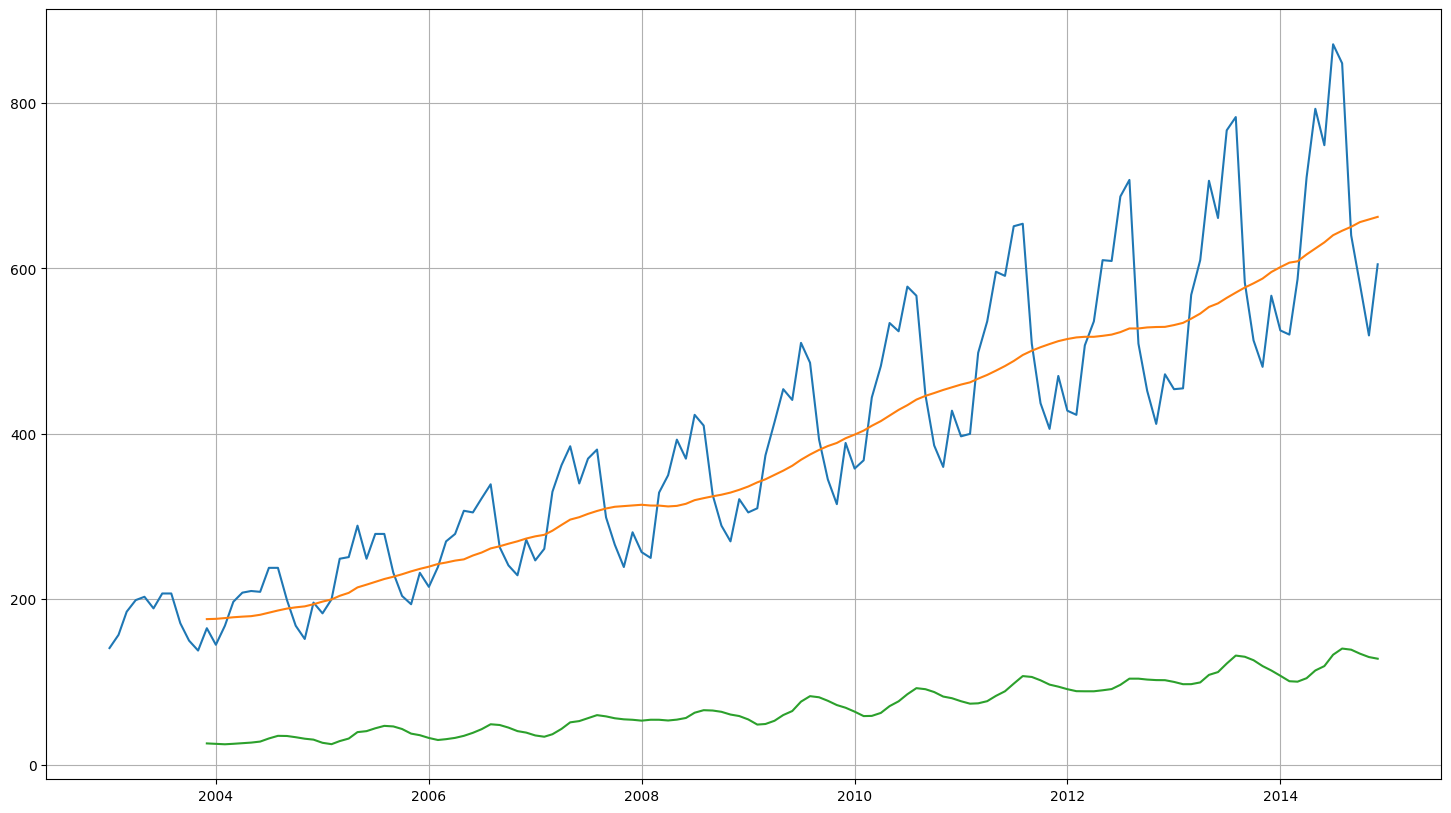

In [34]:
test_stationary(ts_sales)

..................
(-2.5434807731960407, 0.1052501261827305, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, 1067.8217204928185)


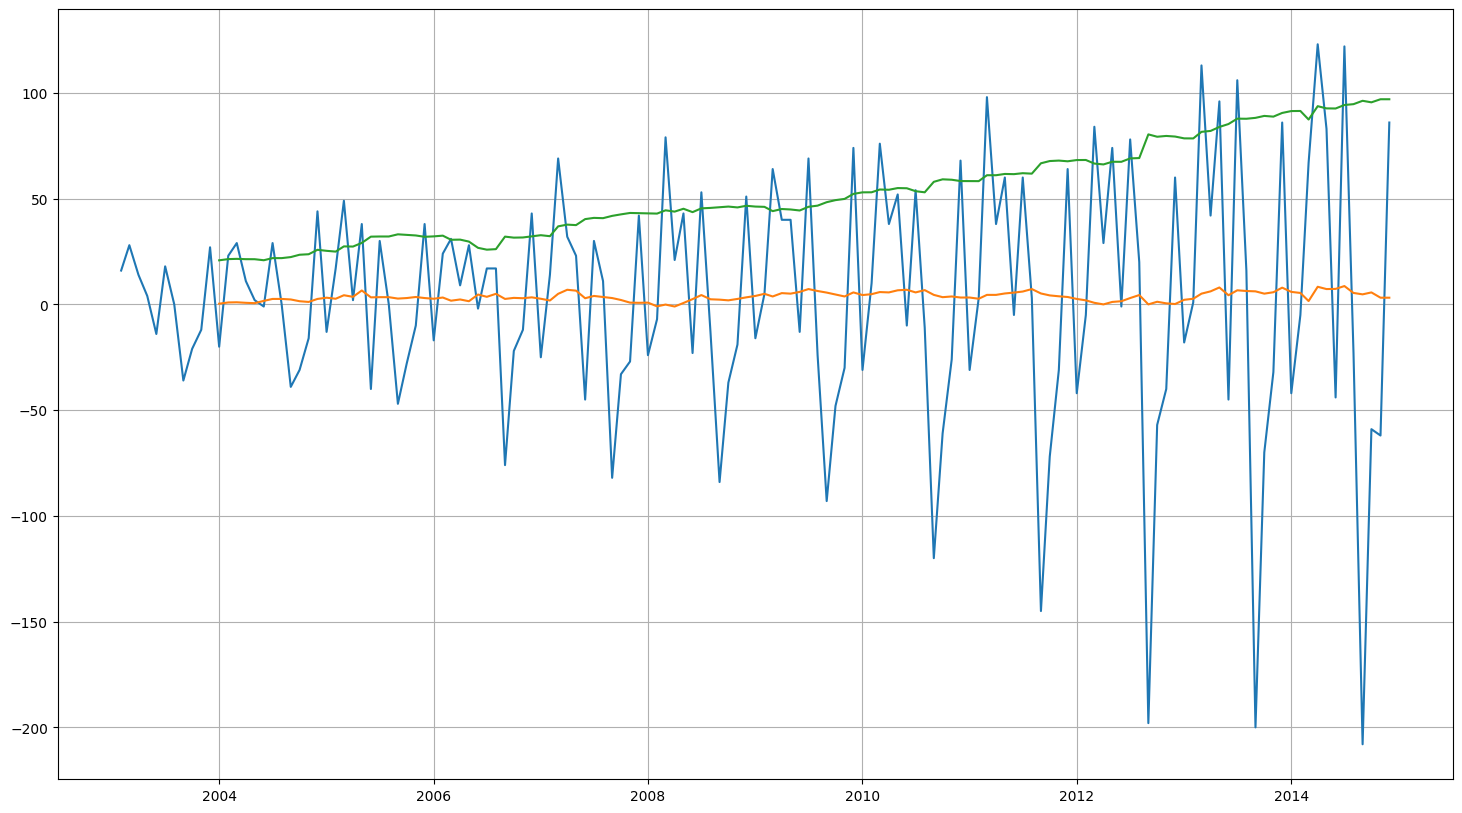

In [35]:
one_diff_data = ts_sales.diff(periods=1)
one_diff_data.dropna(inplace=True)
test_stationary(one_diff_data)

In [36]:
import numpy as np
log_diff_data=np.log(ts_sales).diff(periods=1).dropna()

..................
(-2.6804671199965804, 0.07747972836508807, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -441.8932659968409)


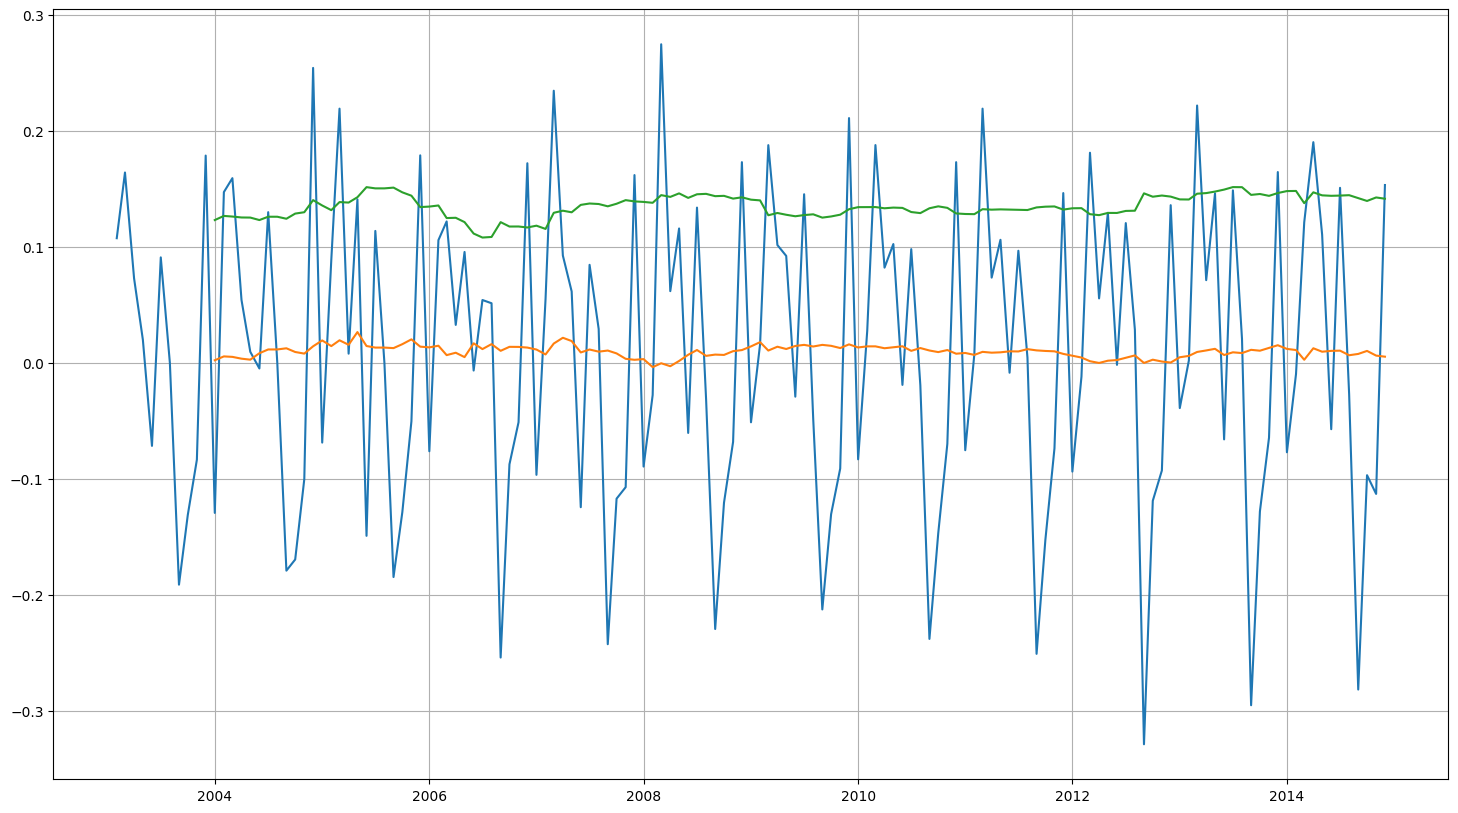

In [37]:
test_stationary(log_diff_data)

In [38]:
import numpy as np
log_diff_data2=np.log(ts_sales).diff(periods=2).dropna()

..................
(-3.200721566232385, 0.01994295010546232, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -434.9038941451596)


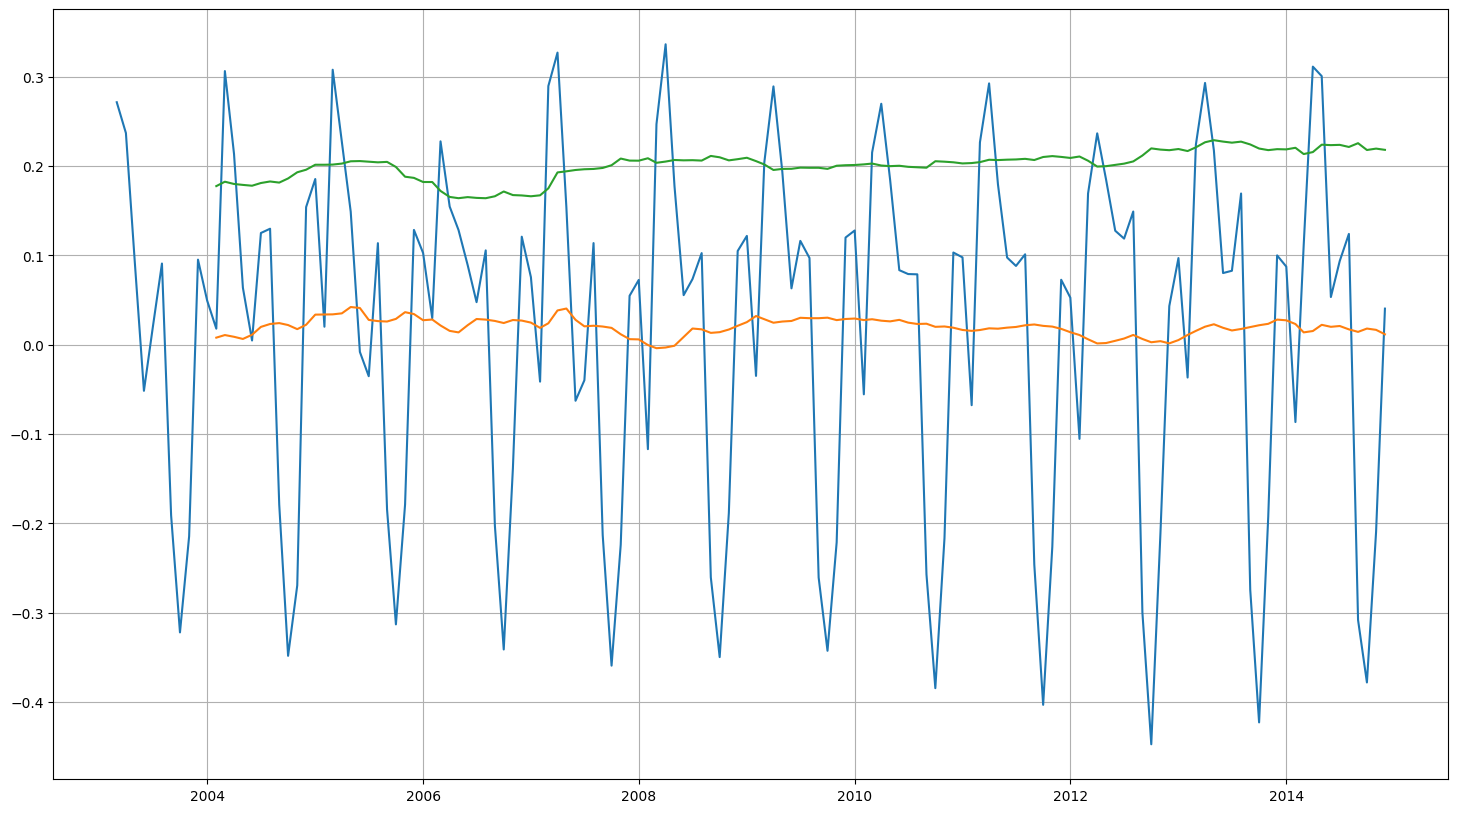

In [39]:
test_stationary(log_diff_data2)

In [40]:
# ARIMA and SARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf


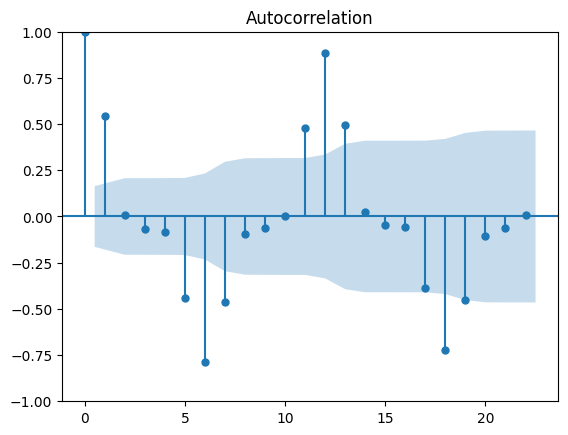

In [41]:
smt.graphics.plot_acf(log_diff_data2);

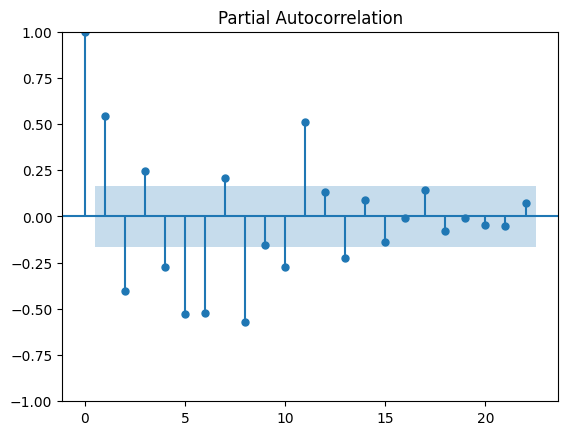

In [42]:
smt.graphics.plot_pacf(log_diff_data2);

In [60]:
evaluate_arima_model(p_value,d_value,q_value)

0 0 0
0 0 1
0 1 0
0 1 1
1 0 0
1 0 1
1 1 0
1 1 1


In [63]:
train_data = log_diff_data2[:120]
test_data = log_diff_data2[120:]

In [65]:
data = [i for i in train_data]
data

[0.27159593470015597,
 0.23705901937618457,
 0.09285015396346274,
 -0.051557809664849685,
 0.019512814223581643,
 0.09097177820572622,
 -0.19105523676270852,
 -0.3220834991691133,
 -0.2144098713454552,
 0.09531017980432477,
 0.049480057263369126,
 0.018018505502678472,
 0.3064699863174143,
 0.21357410029805912,
 0.06390380197947998,
 0.004796172263493048,
 0.12516314295400655,
 0.12993642170666408,
 -0.17896584894698275,
 -0.34830669426821625,
 -0.2694243038782158,
 0.15415067982725805,
 0.1856056319951449,
 0.020202707317519497,
 0.307966743623286,
 0.22713557258374717,
 0.14897379164772495,
 -0.008000042667076102,
 -0.03521490629106694,
 0.11375888535665801,
 -0.1844744101550555,
 -0.3130917879771493,
 -0.17887921260298167,
 0.12861737782209381,
 0.10277986906433423,
 0.02972618026520113,
 0.22778393087071258,
 0.15474822988985437,
 0.1284257885888218,
 0.08909999478604647,
 0.04770379795721169,
 0.10568833077303807,
 -0.2023975133666438,
 -0.34120317388979515,
 -0.13843202862352477,

In [73]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(1,1,1))



In [76]:
model_fit = model.fit()
model_fit.forecast()

array([-0.02375822])

In [81]:
model_fit.bic

-90.1530003819218

In [78]:
model1 = ARIMA(data, order=(2,0,2))


In [82]:
model_fit1 = model1.fit()
model_fit1.forecast()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([0.08893621])

In [84]:
model_fit1.bic

-144.6081497888154

In [95]:
from sklearn.metrics import mean_squared_error
def arima_model(X,y,arima_order):
  history = [i for i in X]
  prediction = list()
  for i in range(len(y)):
    model = ARIMA(data,order=())
    model_fit = model.fit()
    yhat = model_fit.evaluate()
    prediction.append(yhat)
    history.append(y[i])
  mse = np.sqrt(mean_squared_error(y,prediction))
  return mse

In [112]:
def evaluate_arima_model(dataset,test,p_value,d_value,q_value):
  dataset = dataset.astype('float32')
  best_score , best_cfg = float('inf'),None
  for i in p_value:
    for j in d_value:
      for k in q_value:
        order = (i,j,k)
        try:
          rmse = arima_model(dataset,test,order)
          if rmse<best_score :
            best_score , best_cfg = rmse , order
          print('rmse%s , order = %.3f' % (rmse,order))
        except :
          continue
  print(f'best score and best cnf : {best_score} , {best_cfg}')


In [113]:
p_value = range(0,2)
d_value = range(0,2)
q_value = range(0,2)

In [114]:
evaluate_arima_model(train_data,test_data,p_value,d_value,q_value)

best score and best cnf : inf , None
